# Part 1 - Linear SVM
the specified parameters of SVM: **$C = 10$ **

In [57]:
import numpy as np
from utility import *

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [58]:
# step 1: data setting(see ./utility.set_positive_and_negative_data())

iris_data = np.loadtxt('../dataset/iris.txt')
iris_data = iris_data[50:]

positive_data, negative_data = set_positive_and_negative_data(iris_data, [2, 3])

In [59]:
# step 2: split the data in training data and test data(see ./utility.get_training_and_test_data())

x_train, x_test, y_train, y_test, y_train_for_plot = get_training_and_test_data(positive_data, negative_data)

In [60]:
# step 3: get alpha and bias(see ./svm.LinearSVM())

from svm import LinearSVM

linear_svm = LinearSVM(c=100)
linear_svm.fit(x_train, y_train)

alpha = linear_svm.alpha
bias = linear_svm.bias

print('alpha:')
for index in range(len(alpha)):
    print('    {}'.format(round(alpha[index][0], 4)))

print('bias:\n    {}'.format(round(bias[0, 0], 4)))

alpha:
    0.0
    0.0056
    44.4306
    0.0
    0.0076
    0.0
    100.0
    0.0
    0.0
    0.0
    0.0
    0.0031
    0.0
    0.0
    0.0
    0.0
    0.0056
    0.0
    0.0056
    0.0
    100.0
    0.0
    44.4307
    0.0
    0.0
    0.0
    0.0
    0.0
    0.0037
    0.0
    0.0
    100.0
    0.0017
    0.0028
    0.0
    0.0
    0.0
    0.0
    0.0
    0.0
    0.0
    0.0045
    0.0
    0.0
    100.0
    0.0
    0.0
    0.0
    88.8761
    0.0
bias:
    11.0967


In [61]:
# step 4: get accuracy(see ./svm.LinearSVM().evaluate())

accuracy = linear_svm.evaluate(x_test, y_test)
print('Accuracy is: {}%'.format(accuracy))

Accuracy is: 92.0%


[Text(0, 0.5, 'Feature 4'), Text(0.5, 0, 'Feature 3')]

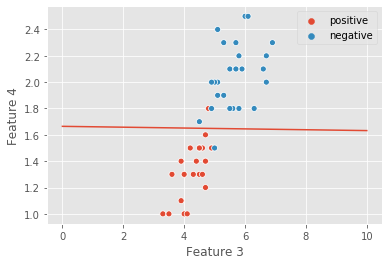

In [62]:
# step 5: plot the feature and hyperplane on plane of feature 3 - feature 4

weight, bias = linear_svm.weight, linear_svm.bias
hyperplane_x, hyperplane_y = linear_svm.get_hyperplane_points(0, 10)

plt.plot(hyperplane_x, hyperplane_y)
sns.scatterplot(x=x_train[:, 0, 0], y=x_train[:, 1, 0], hue=y_train_for_plot).set(xlabel='Feature 3', ylabel='Feature 4')

In [63]:
# step 6, 7: cross validation and average accuracy(see ./utility.cross_validation())

accuracy = cross_validation('linear_svm', x_train, x_test, y_train, y_test, c=10)

print('Average accuracy is: {}%'.format(accuracy))

Average accuracy is: 95.0%


In [64]:
# step 8: modify value of penalty weight C to 100

accuracy = cross_validation('linear_svm', x_train, x_test, y_train, y_test, c=100)

print('When c = 100, average accuray is: {}%'.format(accuracy))

When c = 100, average accuray is: 93.0%
